In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# We would like to predict if a new reservation is likely to be canceled by customers

In [0]:
# import some modules we will need for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**Data Description**

In [0]:
# load our dataset
df = pd.read_csv('/content/drive/Shared drives/Data Mining - OPIM5671/Project_Data/hotel_bookings.csv')

In [0]:
# let's see the head of the .csv file
df.head()  

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [0]:
# get the shape of the dataset
df.shape

(119390, 32)

In [0]:
# to get the names of all the columns, you will use list()
list(df) 

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [0]:
# let's look at the column types
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [0]:
# return some summary statistics on each column
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [0]:
# check missing value
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [0]:
# drop company and agent due to the large amount of missing value

In [0]:
df.drop(['company','agent'],axis=1,inplace=True)

In [0]:
pip install country_converter

     |████████████████████████████████| 51kB 4.2MB/s 
  Created wheel for country-converter: filename=country_converter-0.6.7-cp36-none-any.whl size=50216 sha256=11a8f3c76df94029a29325695e2345f10208b895302e5cb38eecc5d39fa01496
  Stored in directory: /root/.cache/pip/wheels/f9/4a/e7/c8ef69407e41021c414dd56e50bdac424efd1bca3a4346eeb1
Successfully built country-converter


In [0]:
df.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
FJI        1
MMR        1
NAM        1
AIA        1
GUY        1
Name: country, Length: 177, dtype: int64

In [0]:
df.children.value_counts

In [0]:
df.country.fillna(value='PRT', inplace=True)

In [0]:
# Convert all the countries to their respective continents 
import country_converter as coco
cc = coco.CountryConverter()
continents = []
for index, row in df.iterrows():
    continent = cc.convert([row.country], to='continent')
    continents.append(continent)
cont_df = pd.DataFrame(continents, columns=['continent'])
df = pd.concat([df, cont_df], 1)

In [0]:
df.continent.value_counts()

Europe        108314
America         4982
Asia            4468
Africa          1114
Oceania          507
not found          3
Antarctica         2
Name: continent, dtype: int64

In [0]:
df.drop('country',axis=1,inplace=True)

**Correlation Analysis**

In [0]:
cancel_corr = df.corr()["is_canceled"]

In [0]:
cancel_corr.sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [0]:
# The features of lead_time, total_of_special_requests,required_car_parking_spaces, booking_changes, previous-cancellations are highly related to cancellation

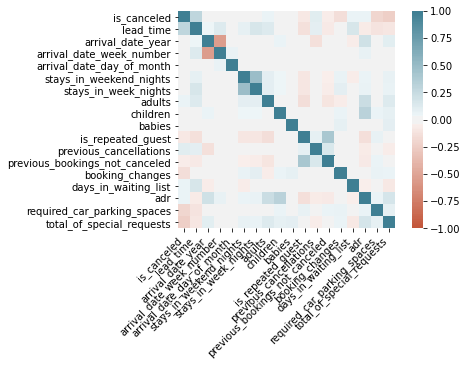

In [0]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
# Visualize Correlation with specific value
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889


In [0]:
# We should exclude highly related colums
# the features of arrival date year and arrival date week number have high correlation 
# We just include arrical date week 
# assigned_room_type: we only know that once the customer checks in, so we cannot use that to make predictions

In [0]:
# because agent and company and country has so many missing values, so we drop them
df.drop(['reservation_status','reservation_status_date','assigned_room_type','arrival_date_year'],axis=1,inplace=True)

In [0]:
df.fillna(df.mode().iloc[0], inplace=True)

In [0]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
continent                         0
dtype: int64


In [0]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,continent
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,3,No Deposit,0,Transient,0.0,0,0,Europe
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,4,No Deposit,0,Transient,0.0,0,0,Europe
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,0,No Deposit,0,Transient,75.0,0,0,Europe
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,0,No Deposit,0,Transient,75.0,0,0,Europe
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,0,No Deposit,0,Transient,98.0,0,1,Europe


In [0]:
# set different data types apart
categorical = [var for var in df.columns if df[var].dtypes == 'object']
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'continent']

In [0]:
# list numerical variable
numerical = [var for var in df.columns if df[var].dtypes != 'object']
numerical

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [0]:
len(numerical)

17

In [0]:
len(categorical)

9

#**Data Visualization**

**1.  Distribution plots for all numeric variables**

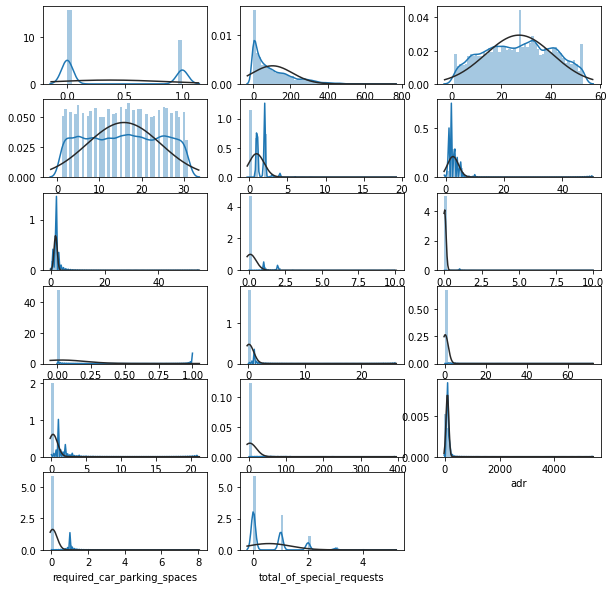

In [0]:
from scipy import stats
fig = plt.figure()
i = 0
for col in numerical:
    try:
        ax = fig.add_subplot(6,3,i+1)
        sns.distplot(df[col], kde=True, fit=stats.norm)
    except ValueError:
        print(str(i)+ ' '+ 'ValueError')
    except RuntimeError:
        print(str(i)+ ' '+ 'RuntimeError')
    i = i+1
fig.set_size_inches(10, 10)

**2. Boxplot for all numerical variables to Y**

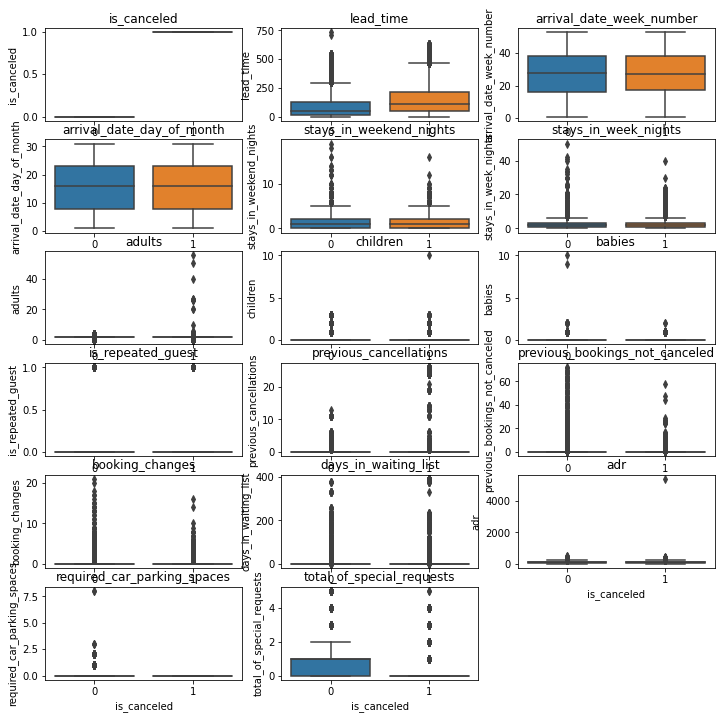

<Figure size 8640x4320 with 0 Axes>

In [0]:
# Boxplots for all numeric variables to Y
fig = plt.figure()
plt.figure(figsize=(120,60))
i = 1
for col in numerical:
    ax = fig.add_subplot(6,3,i)
    sns.boxplot(x = 'is_canceled', y = col, data = df, ax = ax).set_title(col)
    i = i+1
fig.set_size_inches(12, 12)

**3. Bar Plot for all numerical variables to Y**

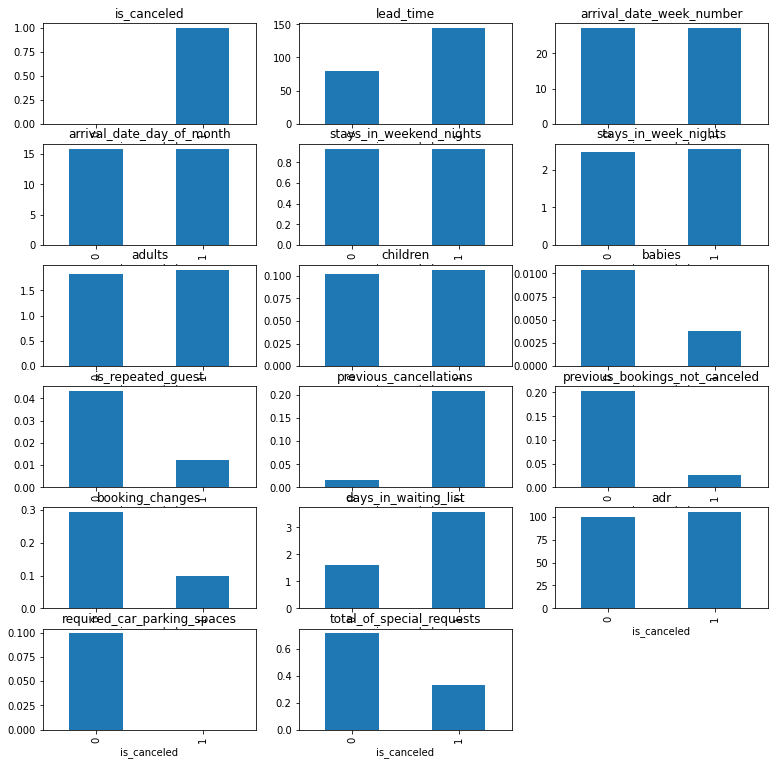

<Figure size 8640x4320 with 0 Axes>

In [0]:
fig = plt.figure()
plt.figure(figsize=(120,60))
i = 1
for col in numerical:
    ax = fig.add_subplot(6,3,i)
    df.groupby(['is_canceled'])[col].mean().plot(kind = 'bar', ax = ax).set_title(col) 
    i = i+1
fig.set_size_inches(13, 13)

In [0]:
print(df['babies'].value_counts().sort_index())

0     118473
1        900
2         15
9          1
10         1
Name: babies, dtype: int64


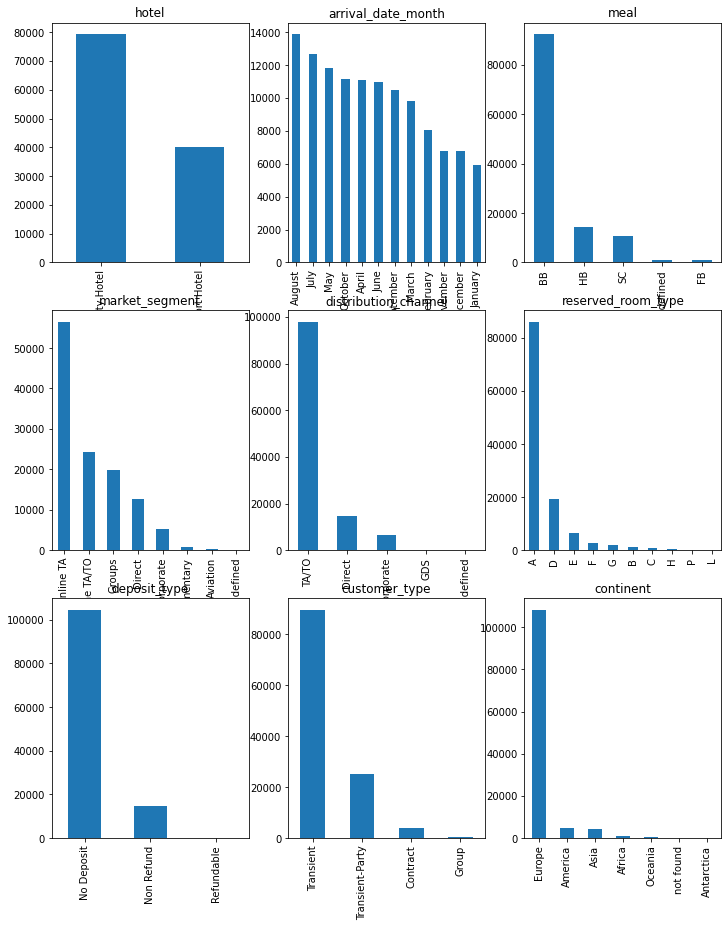

<Figure size 6480x6480 with 0 Axes>

In [0]:
# plot bar plot of all categoricals
fig = plt.figure()
plt.figure(figsize=(90,90))
i = 1
for col in categorical:
    ax = fig.add_subplot(3,3,i)
    df[col].value_counts().plot(kind = 'bar', ax = ax).set_title(col) 
    i = i+1
fig.set_size_inches(12, 15)

**4. Bar plot of all categorical variables with Y**

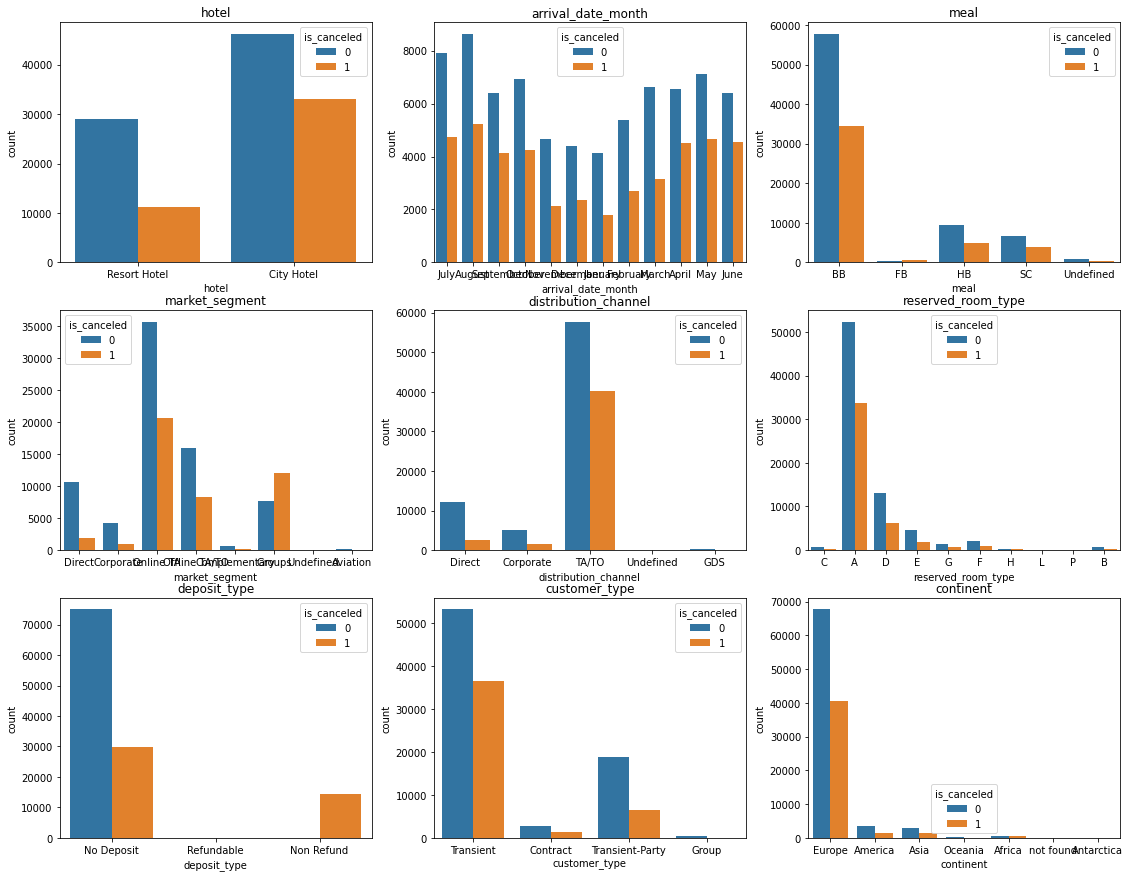

<Figure size 8640x4320 with 0 Axes>

In [0]:
fig = plt.figure()
plt.figure(figsize=(120,60))
i = 1
for col in categorical:
    ax = fig.add_subplot(3,3,i)
    sns.countplot(x=col,hue='is_canceled',data=df,ax = ax).set_title(col) 
    i = i+1
fig.set_size_inches(19, 15)

#**Data Preprocessing**

**1. Change categorical to numerical**

In [0]:
for i in categorical:
    df = pd.concat([df, pd.get_dummies(df[i], drop_first=True)], axis=1) 
    # drop_first: Whether to get k-1 dummies out of k categorical levels by removing the first level.

In [0]:
df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,continent,Resort Hotel,August,December,February,January,July,June,March,May,November,October,September,FB,HB,SC,Undefined,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined,Direct,GDS,TA/TO,Undefined,B,C,D,E,F,G,H,L,P,Non Refund,Refundable,Group,Transient,Transient-Party,America,Antarctica,Asia,Europe,Oceania,not found
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,3,No Deposit,0,Transient,0.00,0,0,Europe,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,4,No Deposit,0,Transient,0.00,0,0,Europe,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,0,No Deposit,0,Transient,75.00,0,0,Europe,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,0,No Deposit,0,Transient,75.00,0,0,Europe,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,0,No Deposit,0,Transient,98.00,0,1,Europe,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,0,No Deposit,0,Transient,96.14,0,0,Europe,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
119386,City Hotel,0,102,August,35,31,2,5,3,0.0,0,BB,Online TA,TA/TO,0,0,0,E,0,No Deposit,0,Transient,225.43,0,2,Europe,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
119387,City Hotel,0,34,August,35,31,2,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,D,0,No Deposit,0,Transient,157.71,0,4,Europe,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
119388,City Hotel,0,109,August,35,31,2,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,0,No Deposit,0,Transient,104.40,0,0,Europe,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [0]:
df=df.drop(['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'continent'],axis=1)

In [0]:
df

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Resort Hotel,August,December,February,January,July,June,March,May,November,October,September,FB,HB,SC,Undefined,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined,Direct,GDS,TA/TO,Undefined,B,C,D,E,F,G,H,L,P,Non Refund,Refundable,Group,Transient,Transient-Party,America,Antarctica,Asia,Europe,Oceania,not found
0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
119386,0,102,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
119387,0,34,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
119388,0,109,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [0]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [0]:
y=df['is_canceled']

In [0]:
x=df.iloc[:,1:]

**Download cleaned dataset**

In [0]:
from google.colab import files

In [0]:
df.to_csv('Cleaned_Data.csv',index=False)

In [0]:
#files.download('Cleaned_Data.csv')

**Data Preprocessing**

In [0]:
# Seperate data into training and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [0]:
# Standardization
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_test_std=stdsc.fit_transform(X_test)

#**Modeling**

**1. Dense Neural Network**

In [0]:
%tensorflow_version 1.x
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout

model1 = models.Sequential()
model1.add(Dense(64, # number of hidden units
                        activation='relu', # we need relu for nonlinearity!
                        input_shape=(X_train.shape[1],))) # You need to specify the input columns, not rows!
                        
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(8, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid')) 

# Compile model
model1.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
model1.summary()

TensorFlow 1.x selected.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4096      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1

In [0]:
history=model1.fit(X_train_std, y_train, validation_data=(X_test_std, y_test), nb_epoch=10, batch_size=200)

Train on 83573 samples, validate on 35817 samples
Epoch 1/10
83573/83573 [==============================] - 3s 41us/sample - loss: 0.6591 - acc: 0.6298 - val_loss: 0.5202 - val_acc: 0.7579
Epoch 2/10
83573/83573 [==============================] - 2s 19us/sample - loss: 0.5370 - acc: 0.7424 - val_loss: 0.4552 - val_acc: 0.7816
Epoch 3/10
83573/83573 [==============================] - 2s 20us/sample - loss: 0.4994 - acc: 0.7643 - val_loss: 0.4428 - val_acc: 0.7831
Epoch 4/10
83573/83573 [==============================] - 2s 20us/sample - loss: 0.4808 - acc: 0.7733 - val_loss: 0.4329 - val_acc: 0.7888
Epoch 5/10
83573/83573 [==============================] - 2s 18us/sample - loss: 0.4717 - acc: 0.7749 - val_loss: 0.4274 - val_acc: 0.7914
Epoch 6/10
83573/83573 [==============================] - 2s 19us/sample - loss: 0.4625 - acc: 0.7789 - val_loss: 0.4184 - val_acc: 0.7989
Epoch 7/10
83573/83573 [==============================] - 2s 18us/sample - loss: 0.4559 - acc: 0.7808 - val_loss: 0.

In [0]:
# create confusion matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def inverse_label(arr):
    arr = arr.astype(int).astype(str)
    arr[arr=='1'] = 'Canceled'
    arr[arr=='0'] = 'NotCanceled'
    
    return arr

def my_plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
   
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
          
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def confusion_report(classifier,x,y_true,title='DNNs Model'):
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    fig = plt.figure(figsize=(10,5))
    y_pred = classifier.predict_classes(x)
    y_true = y_true.ravel()
    y_pred = y_pred.ravel()
    y_pred[0] = 1
    
   
    
    class_names = ['Canceled','NotCanceled']
    
    my_plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title=title)

Confusion matrix, without normalization
[[21716   655]
 [ 6339  7107]]


<Figure size 720x360 with 0 Axes>

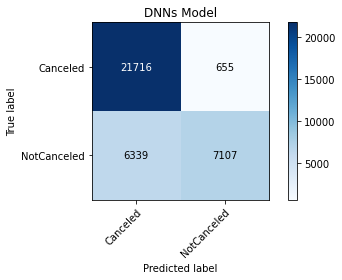

In [0]:
# create confusion matrix report
confusion_report(model1,X_test_std,y_test)

In [0]:
# Final evaluation of the model
scores = model1.evaluate(X_test_std,y_test, verbose=0)
print("Accuracy of DNN Model: %.2f%%" % (scores[1]*100))

Accuracy of DNN Model: 80.48%


**2. Extreme Gradient Boosting**

In [0]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train_std, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
yhat_XGB = XGB.predict(X_test_std)

In [0]:
# Classification Report
print(classification_report(y_train,  XGB.predict(X_train_std)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     52795
           1       0.84      0.61      0.71     30778

    accuracy                           0.81     83573
   macro avg       0.82      0.77      0.79     83573
weighted avg       0.82      0.81      0.81     83573



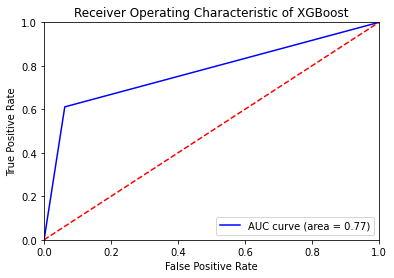

In [0]:
# ROC-AUC Curve for support vector machine
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds_RF = roc_curve(y_test, yhat_XGB)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of XGBoost')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
# Final evaluation of XGBoost
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,yhat_XGB)
print("Accuracy of XGBoost: %.2f%%" % (accuracy * 100.0))

Accuracy of XGBoost: 81.55%


**2.1 Tuning XG Boost**

In [0]:
from xgboost import XGBClassifier

**Tune Max Depth and Min Child Weight**

In [0]:
from sklearn.model_selection import learning_curve,GridSearchCV

In [0]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [0]:
gsearch1.fit(X_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fa

In [0]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9147230154381736)

In [0]:
param_test2 = {
 'max_depth':[8,9,10],
 'min_child_weight':[1,2,3]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [0]:
gsearch2.fit(X_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=2,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': [8, 9, 10],
                         'min_child_weight': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
     

In [0]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 10, 'min_child_weight': 1}, 0.9175263878575256)

In [0]:
# Therefore, the optimum value for max_depth is 10 and the optimum value for min_child_weight is 1

**Tune gamma**

In [0]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=10,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [0]:
gsearch3.fit(X_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=10, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [0]:
gsearch3.best_params_, gsearch2.best_score_

({'gamma': 0.1}, 0.9175263878575256)

In [0]:
# The optimum value of gamma is 0.1

**Tune subsample and col_sample_bytree**

In [0]:
param_test4 = {
 'subsample':[i/10.0 for i in range(5,10)],
 'colsample_bytree':[i/10.0 for i in range(5,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=10,
 min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [0]:
gsearch4.fit(X_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0.1,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=10, min_child_weight=1,
                                     missing=None, n_estimators=177, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]},
             pre_dispatch='2*n_jobs', refit=Tru

In [0]:
gsearch4.best_params_, gsearch2.best_score_

({'colsample_bytree': 0.7, 'subsample': 0.8}, 0.9175263878575256)

In [0]:
# The best value for subsample is 0.8 and the best value for colsample_bytree is 0.7

**Final XGBoost**

In [0]:
XGBOOST = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=10,
 min_child_weight=1,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.7,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [0]:
XGBOOST.fit(X_train_std, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
yhat_XGBOOST = XGBOOST.predict(X_test_std)

In [0]:
# Final evaluation of XGBoost
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,yhat_XGBOOST)
print("Accuracy of Final XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy of Final XGBOOST: 85.12%


**3. Support Vector Machine**

In [0]:
from sklearn import svm
# define the mdoel
clf = svm.SVC(kernel='rbf')
# fit the model
clf.fit(X_train_std, y_train) 
# predict using text dataset
yhat_SVM = clf.predict(X_test_std)
yhat_SVM [0:5]

array([0, 1, 1, 0, 1])

In [0]:
# Accuracy Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy of SVM: ", round(accuracy_score(y_test, clf.predict(X_test_std))*100,2),'%')

Accuracy of SVM:  82.48 %


In [0]:
print(confusion_matrix(y_test, yhat_SVM))

In [0]:
# print out classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat_SVM))

In [0]:
# ROC-AUC Curve for support vector machine
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds_RF = roc_curve(y_test, yhat_SVM)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of support vector machine')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**4. Logistic Model**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_std,y_train)
LR
## Now we can predict using our test set
yhat_logistic = LR.predict(X_test_std)
yhat_logistic


array([0, 1, 1, ..., 0, 0, 0])

In [0]:
# show the probabilty
yhat_prob = LR.predict_proba(X_test_std)
yhat_prob

array([[0.53150221, 0.46849779],
       [0.45310999, 0.54689001],
       [0.00158001, 0.99841999],
       ...,
       [0.58760484, 0.41239516],
       [0.86437202, 0.13562798],
       [0.56086108, 0.43913892]])

In [0]:
# classification report
print(classification_report(y_test,yhat_logistic))

In [0]:
# accuracy metric
print("Accuracy of Logistic Regression: ", round(metrics.accuracy_score(y_test, LR.predict(X_test_std))*100,2),'%')

In [0]:
# ROC-AUC Curve for logistic regression
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds_RF = roc_curve(y_test, yhat_logistic)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of logistic regression')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**5. Decision Tree**

In [0]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
#Predict the response for test dataset
clf2.fit(X_train_std,y_train)
#Predict the response for test dataset
yhat_decision_tree = clf2.predict(X_test_std)
yhat_decision_tree

array([0, 1, 1, ..., 1, 0, 1])

In [0]:
feature_cols=x.columns

In [0]:
# feature_importances
df = pd.DataFrame(data = clf2.feature_importances_, index=feature_cols,columns=['importance'])
feature_importances = df.sort_values('importance',ascending=False)
feature_importances[0:10]

,importance
Non Refund,0.578451
total_of_special_requests,0.108723
lead_time,0.099492
Online TA,0.093274
previous_cancellations,0.071995
previous_bookings_not_canceled,0.013562
required_car_parking_spaces,0.011367
Transient-Party,0.008694
Resort Hotel,0.006349
booking_changes,0.003171


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


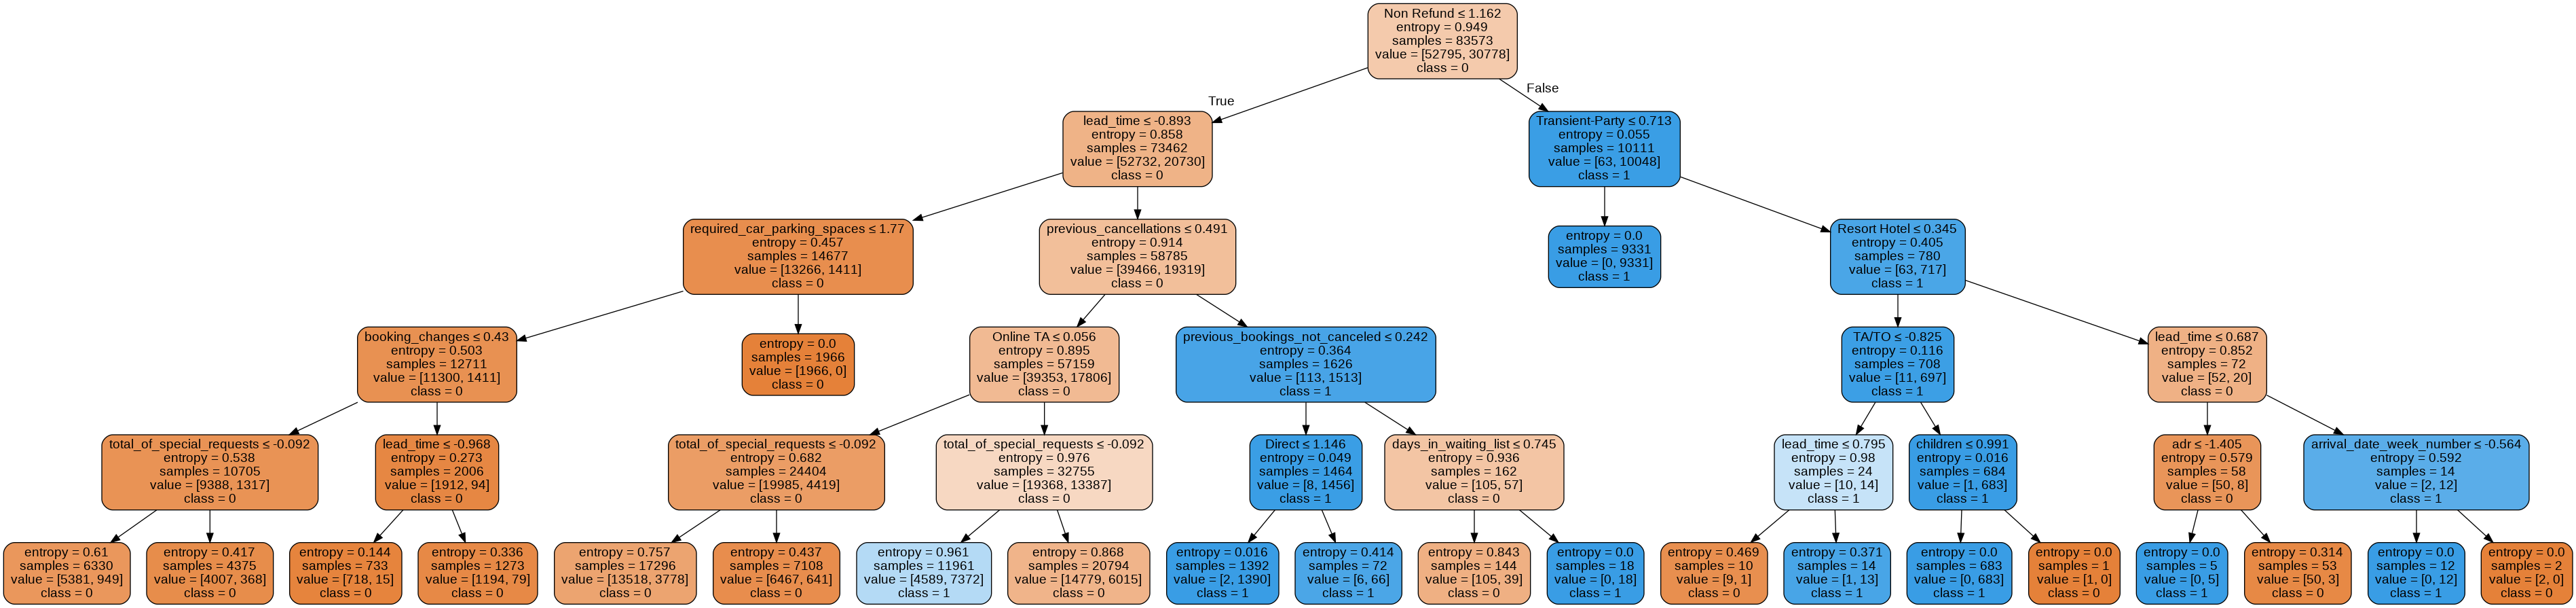

In [0]:
# Visualize decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Is_canceled.png')
Image(graph.create_png())

In [0]:
# classification report
print(classification_report(y_test,yhat_decision_tree))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85     22371
           1       0.81      0.62      0.70     13446

    accuracy                           0.80     35817
   macro avg       0.81      0.77      0.78     35817
weighted avg       0.80      0.80      0.80     35817



In [0]:
# accuracy metric
print("Accuracy of Decision Tree: ", round(metrics.accuracy_score(y_test, clf2.predict(X_test_std))*100,2),'%')

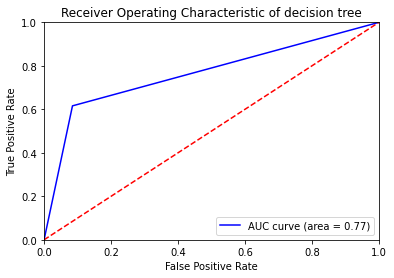

In [0]:
# ROC-AUC Curve for logistic regression
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds_RF = roc_curve(y_test, yhat_decision_tree)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of decision tree')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**6. Random Forest**

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf3=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf3.fit(X_train_std,y_train)
yhat_random_forest=clf3.predict(X_test_std)
yhat_random_forest

array([0, 0, 1, ..., 0, 0, 0])

In [0]:
# classification report
print(classification_report(y_test,yhat_random_forest))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     22371
           1       0.87      0.74      0.80     13446

    accuracy                           0.86     35817
   macro avg       0.86      0.84      0.85     35817
weighted avg       0.86      0.86      0.86     35817



In [0]:
# accuracy metric
print("Accuracy of Random Forest: ", round(accuracy_score(y_test, clf3.predict(X_test_std))*100,2),'%')

Accuracy of Random Forest:  86.1 %


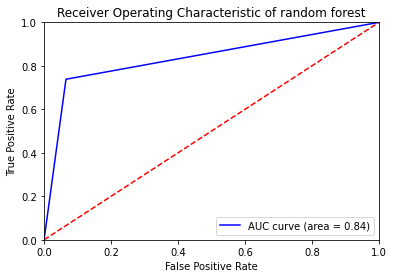

In [0]:
# ROC-AUC Curve for logistic regression
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds_RF = roc_curve(y_test, yhat_random_forest)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of random forest')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**7. Naive Bayes**

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train_std, y_train).predict(X_test_std)

# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.11      0.20     22371
           1       0.40      1.00      0.57     13446

    accuracy                           0.44     35817
   macro avg       0.69      0.55      0.38     35817
weighted avg       0.76      0.44      0.34     35817



In [0]:
# accuracy metric
print("Accuracy of Naive Bayes: ", round(accuracy_score(y_test, y_pred)*100,2),'%')

Accuracy of Naive Bayes:  44.18 %


**8. KNN**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [0]:
# Find the best K

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_std ,y_train)
    yhat=neigh.predict(X_test_std)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

In [0]:
# Plot model accuracy for different number of neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.title('model accuracy with the change of K')
plt.tight_layout()
plt.show()

In [0]:
# Training at the best k
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_std,y_train)
neigh
# Predicting
yhat = neigh.predict(X_test_std)
yhat[0:5]
# Accuracy Evaluation
from sklearn import metrics
print("Accuracy of KNN (K=2): ", round(metrics.accuracy_score(y_test, neigh.predict(X_test_std))*100,2),'%')

Accuracy of KNN (K=2):  81.38 %


In [0]:
# print out classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     22371
           1       0.85      0.61      0.71     13446

    accuracy                           0.81     35817
   macro avg       0.83      0.77      0.79     35817
weighted avg       0.82      0.81      0.81     35817



#**ROC curves comparison**

In [0]:
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'KNN',
    'model': KNeighborsClassifier(n_neighbors = 2),
},
{
    'label': 'Extreme Gradient Boosting',
    'model': XGBClassifier(),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label':'Decision Tree',
    'model':DecisionTreeClassifier(criterion="entropy", max_depth = 5),
},
{
    'label':'Random Forest',
    'model':RandomForestClassifier(n_estimators=100), 
},
{
    'label':'Logistic Regression',
    'model':LogisticRegression(C=0.01, solver='liblinear'),
},
{
    'label':'SVM with RBF Kernel',
    'model':svm.SVC(C=100, gamma=0.1, kernel='rbf', probability=True),
},
]
# Below for loop iterates through your models list
fig = plt.figure(figsize=(8,6))
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_std, y_train) # train the model
    y_pred=model.predict(X_test_std) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_std)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_std))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 

plt.plot([0, 1], [0, 1],'r--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(loc='lower right')
plt.show()   # Display